In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# 2D advection equation

Two dimensional linear advection equation is 

$$\frac{\partial \phi}{\partial t}+u\frac{\partial \phi}{\partial x}+v\frac{\partial \phi}{\partial y} = 0$$

where $u$ is the velocity in the $x$-direction and $y$-direction. As a first example in solving a 2D partial differental equation, you will advect a gaussian profile

$$\Psi_{o} = \Psi(x,y,t=0)=e^{\frac{(x-x_{o})^{2}+(y-y_{o})^{2}}{2\sigma^{2}}}$$

with $x_{o} = y_{o}=30$, $\sigma = \sqrt{15}$, with positive velocities $u=v=0.8$ in a $[0,100]\times[0,100]$ domain.In order to handle the boundaries, we will choose "outflow" boundary conditions, that simply copy the data of the las interior grid point into the boundary points 

Here is the coupled of PDE's

$$\frac{\partial \phi}{\partial t} + u \frac{\partial \phi}{\partial x} + v \frac{\partial \phi}{\partial y} = 0$$


Now we use the central finite difference for all derivatives 

$$\frac{\phi_{i,j}^{n+1} - \phi_{i,j}^n}{\Delta t} + u \frac{\phi_{i,j}^n-\phi_{i-1,j}^n}{\Delta x} + v \frac{\phi_{i,j}^n - \phi_{i,j-1}^n}{\Delta y} = 0 $$


Now , we reorganize the equation to obtain the next step in time for each varible 

$$\phi_{i,j}^{n+1} =  \phi_{i,j}^n - \frac{\Delta t}{\Delta x} u (\phi_{i,j}^n - \phi_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v(u_{i,j}^n - u_{i,j-1}^n) 
$$


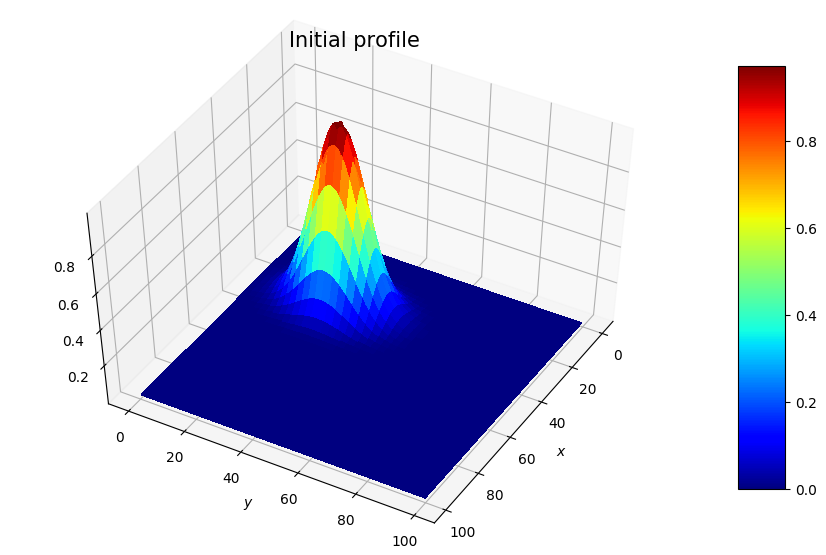

In [138]:
nx = 256; ny = 256
Lx = 100; Ly = 100
sigma = np.sqrt(80)
dx = Lx/nx; dy = Ly/ny 
xo = 30; yo = 30

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, Lx, Lx/nx)
y = np.arange(0, Ly, Ly/ny)
phi = np.zeros((nx,ny))
X, Y = np.meshgrid(x, y)
phi = np.zeros((nx,ny))

for i in range(nx):
    for j in range(ny):
        phi[i,j] = np.exp(-(0.5*(x[i]-xo)**2 + (y[j]-yo)**2)/sigma**2)


surf = ax.plot_surface(X, Y, phi, cmap=plt.cm.jet,
                       linewidth=0, antialiased=False)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Initial profile',fontsize = "15")
fig.colorbar(surf, shrink=0.8, aspect=9)
ax.view_init(elev = 50, azim= 30)


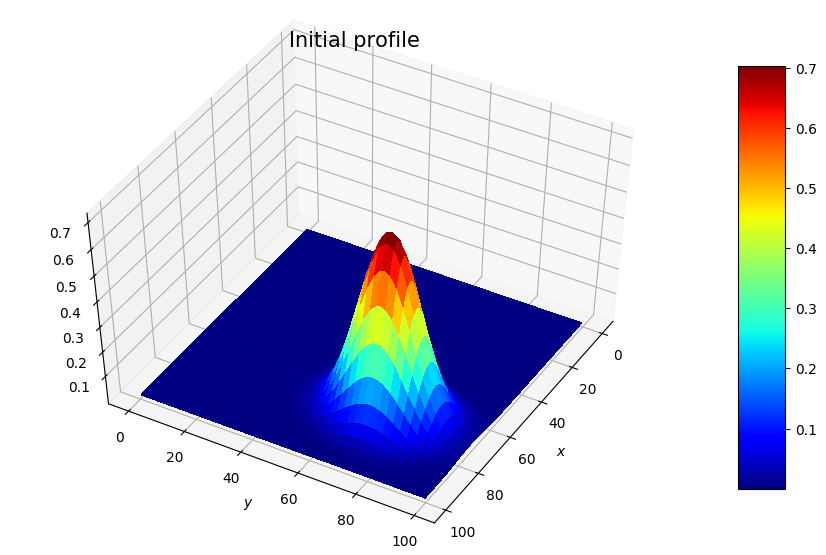

In [139]:
dt = 0.1
u = 0.8; v = 0.8 
for t in range(300):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            phi[i,j] = phi[i,j]-(dt*u/dx)*(phi[i,j]-phi[i-1,j])-(dt*v/dy)*(phi[i,j]-phi[i,j-1])
        
    phi[0,0] = 0.4*(phi[1,0]+phi[0,1])+0.2*phi[1,1]
    phi[0,-1] = 0.4*(phi[0,-2]+phi[1,-1])+0.2*phi[1,-2]
    phi[-1,0] = 0.4*(phi[-1,1]+phi[-2,0])+0.2*phi[-2,1]
    phi[-1,-1] = 0.4*(phi[-1,-2]+phi[-2,-1])+0.2*phi[-2,-2]
    
    phi[0,:] = phi[1,:]
    phi[-1,:] = phi[-2,:]
    phi[:,0] = phi[:,1]
    phi[:,-1] = phi[:,-2]
        
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, phi, cmap=plt.cm.jet,
                       linewidth=0, antialiased=False)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Initial profile',fontsize = "15")
fig.colorbar(surf, shrink=0.8, aspect=9)
ax.view_init(elev = 50, azim= 30)